In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("/content/Flight_Booking.csv")

In [27]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
df = df.drop(columns=["Unnamed: 0"])

In [30]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


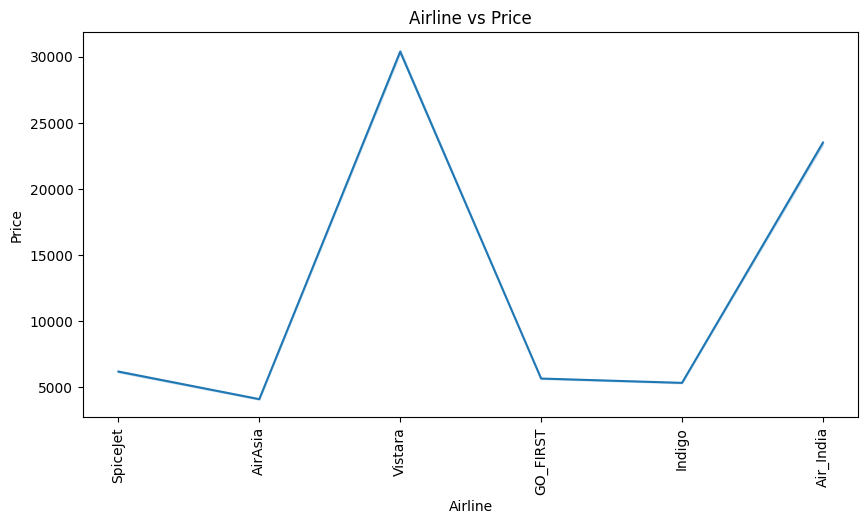

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df["airline"],y=df["price"])
plt.title("Airline vs Price")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

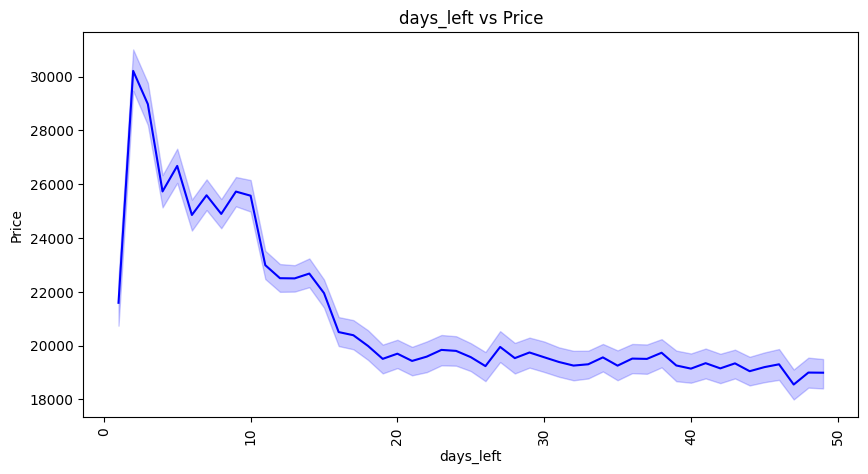

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df["days_left"],y=df["price"],color='blue')
plt.title("days_left vs Price")
plt.xlabel("days_left")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

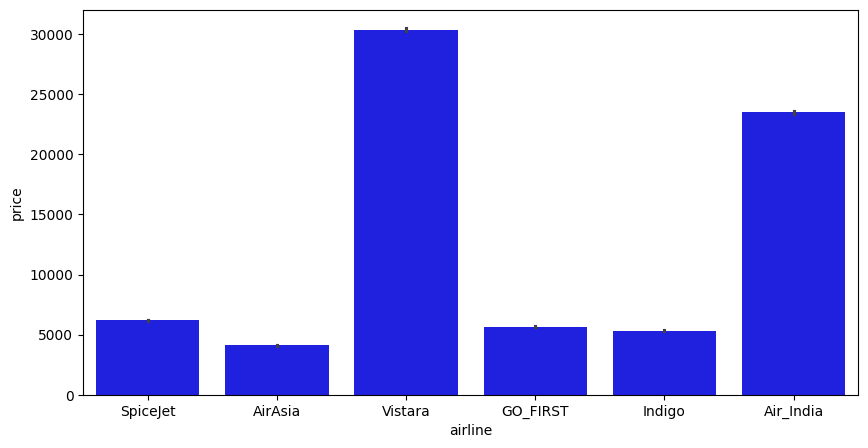

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["airline"],y=df["price"],color='blue')

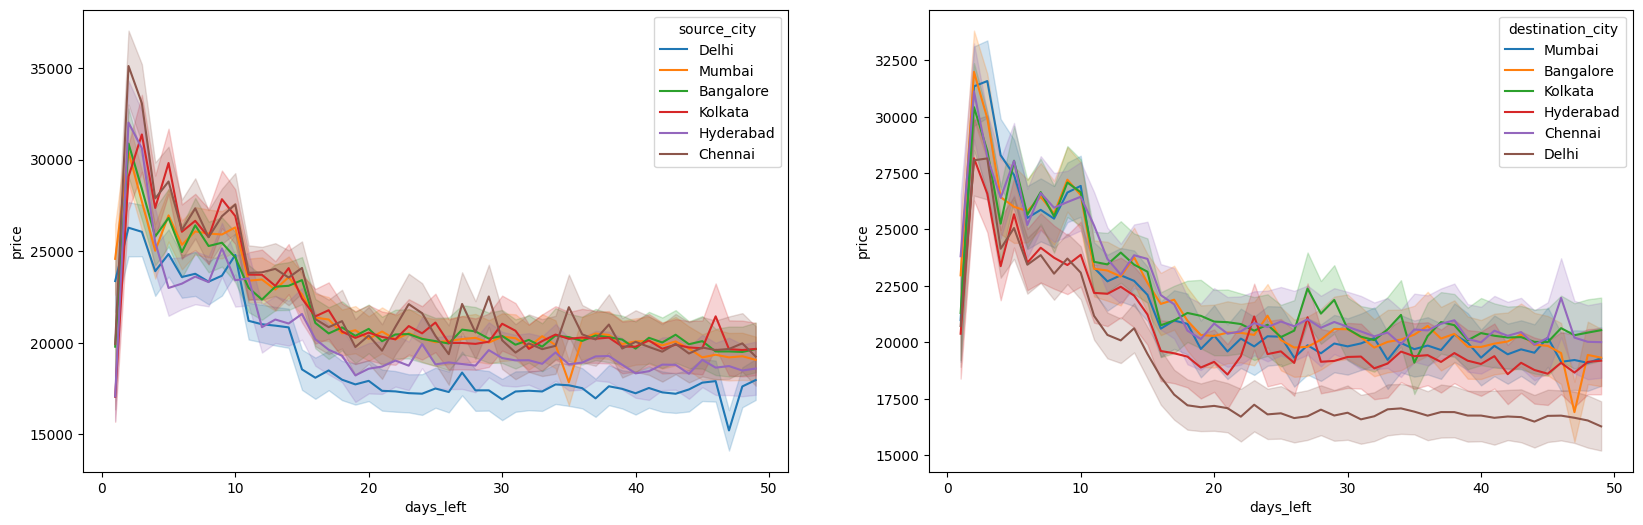

In [35]:
fig, ax=plt. subplots (1,2, figsize= (20,6))
sns. lineplot(x= "days_left",y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x= "days_left",y= 'price',data=df,hue='destination_city',ax=ax[1])
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le. fit_transform(df[ "airline"])
df["source_city"]=le. fit_transform(df["source_city"])
df["departure_time"]=le. fit_transform(df["departure_time"])
df["stops"]=le. fit_transform(df["stops" ])
df[ "arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le. fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


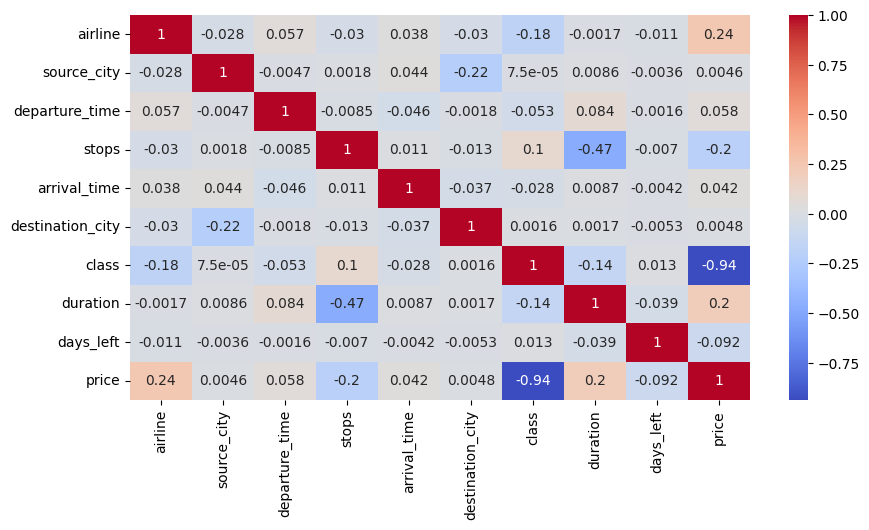

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df.drop('flight', axis=1).corr(),annot=True,cmap="coolwarm")
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Prepare the data for VIF calculation
# Drop the target variable 'price' and any non-numeric columns that should not be used in VIF calculation
X = df.drop(columns=['price', 'flight'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF values
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF) for each feature:
            feature       VIF
7          duration  4.113876
8         days_left  3.976790
4      arrival_time  3.684550
0           airline  3.393124
1       source_city  2.927766
5  destination_city  2.885337
6             class  2.849370
2    departure_time  2.779427
3             stops  1.426614


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Define features (X) and target (y)
X = df.drop(columns=['price', 'flight']) # Exclude 'flight' as it's non-numeric and 'price' is the target
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Linear Regression model trained and predictions made.")

Linear Regression model trained and predictions made.


In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# MAPE requires non-zero actual values to avoid division by zero
# We'll handle cases where y_test might have zeros if any (though unlikely for prices)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 if (y_test != 0).all() else np.nan

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 49200540.29
Root Mean Squared Error (RMSE): 7014.31
R-squared (R2): 0.9046
Mean Absolute Error (MAE): 4624.99
Mean Absolute Percentage Error (MAPE): 43.54%


This cell calculates and displays several key evaluation metrics for the Linear Regression model:

*   **Mean Squared Error (MSE)**: The average of the squares of the errors.
*   **Root Mean Squared Error (RMSE)**: The square root of the MSE, providing an error measure in the same units as the target variable.
*   **R-squared (R2)**: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between predictions and actual values.
*   **Mean Absolute Percentage Error (MAPE)**: Measures the accuracy of the predictions as a percentage.

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

print("Decision Tree Regressor model trained and predictions made.")

Decision Tree Regressor model trained and predictions made.


In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calculate evaluation metrics for Decision Tree
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)

# MAPE requires non-zero actual values to avoid division by zero
dt_mape = np.mean(np.abs((y_test - dt_y_pred) / y_test)) * 100 if (y_test != 0).all() else np.nan

print(f"Decision Tree - Mean Squared Error (MSE): {dt_mse:.2f}")
print(f"Decision Tree - Root Mean Squared Error (RMSE): {dt_rmse:.2f}")
print(f"Decision Tree - R-squared (R2): {dt_r2:.4f}")
print(f"Decision Tree - Mean Absolute Error (MAE): {dt_mae:.2f}")
print(f"Decision Tree - Mean Absolute Percentage Error (MAPE): {dt_mape:.2f}%")

Decision Tree - Mean Squared Error (MSE): 12531654.34
Decision Tree - Root Mean Squared Error (RMSE): 3540.01
Decision Tree - R-squared (R2): 0.9757
Decision Tree - Mean Absolute Error (MAE): 1171.29
Decision Tree - Mean Absolute Percentage Error (MAPE): 7.39%


This cell calculates and prints the evaluation metrics for the Decision Tree Regressor model, allowing for a comparison with the Linear Regression model's performance.

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1) # Using 100 estimators and all available cores
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

print("Random Forest Regressor model trained and predictions made.")

Random Forest Regressor model trained and predictions made.


In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calculate evaluation metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

# MAPE requires non-zero actual values to avoid division by zero
rf_mape = np.mean(np.abs((y_test - rf_y_pred) / y_test)) * 100 if (y_test != 0).all() else np.nan

print(f"Random Forest - Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Random Forest - R-squared (R2): {rf_r2:.4f}")
print(f"Random Forest - Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Random Forest - Mean Absolute Percentage Error (MAPE): {rf_mape:.2f}%")

Random Forest - Mean Squared Error (MSE): 7764563.91
Random Forest - Root Mean Squared Error (RMSE): 2786.50
Random Forest - R-squared (R2): 0.9849
Random Forest - Mean Absolute Error (MAE): 1091.44
Random Forest - Mean Absolute Percentage Error (MAPE): 7.04%


# Flight Price Prediction Project

## Project Overview
This project focuses on predicting flight prices using a dataset containing various flight-related features. The goal is to build and evaluate machine learning models to accurately forecast flight fares, providing insights into the factors influencing pricing.

## Dataset
The project utilizes the `Flight_Booking.csv` dataset, which includes information such as airline, flight number, source/destination cities, departure/arrival times, number of stops, flight duration, days left until departure, and the price.

## Methodology

### 1. Data Loading and Initial Exploration
- The dataset was loaded into a pandas DataFrame.
- Initial checks were performed using `df.head()`, `df.info()`, and `df.isnull().sum()` to understand the data structure and identify missing values. No missing values were found.

### 2. Data Preprocessing
- The 'Unnamed: 0' column, which appeared to be an index, was dropped.
- Label Encoding was applied to all categorical features to convert them into numerical representations suitable for machine learning models. The encoded features include: `airline`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, and `class`.

### 3. Exploratory Data Analysis (EDA)
- **Airline vs. Price**: A line plot was generated to visualize the average price for each airline.
- **Days Left vs. Price**: A line plot showed the relationship between the number of days left until departure and flight prices, indicating that prices tend to increase as the departure date approaches.
- **Correlation Heatmap**: A heatmap was created to visualize the correlation matrix of the numerical features, helping to understand relationships between variables.

### 4. Feature Selection (VIF Analysis)
- **Variance Inflation Factor (VIF)**: VIF was calculated for all independent variables to detect multicollinearity. All VIF values were found to be low (below 5), suggesting no significant multicollinearity among the features. This indicates that all selected features can be used in the models without causing stability issues.

### 5. Model Training and Evaluation
Three different regression models were trained and evaluated on the dataset. The data was split into training (80%) and testing (20%) sets. The models were evaluated using the following metrics:
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R-squared (R2)**
- **Mean Absolute Error (MAE)**
- **Mean Absolute Percentage Error (MAPE)**

#### a. Linear Regression
- **R2**: 0.9046
- **RMSE**: 7014.31
- **MAE**: 4624.99
- **MAPE**: 43.54%

#### b. Decision Tree Regressor
- **R2**: 0.9757
- **RMSE**: 3540.01
- **MAE**: 1171.29
- **MAPE**: 7.39%

#### c. Random Forest Regressor
- **R2**: 0.9849
- **RMSE**: 2786.50
- **MAE**: 1091.44
- **MAPE**: 7.04%

## Results and Conclusion

The **Random Forest Regressor** demonstrated the best performance among the three models, achieving the highest R-squared value (0.9849) and the lowest error metrics (RMSE, MAE, MAPE). This indicates that the Random Forest model is highly effective in capturing the complex relationships within the flight booking data and provides the most accurate predictions for flight prices.

The project successfully built and evaluated machine learning models for flight price prediction, with Random Forest emerging as the top-performing model. The analysis also provided insights into key factors influencing flight prices, such as 'class' and 'days_left'.

## How to Run
This project was developed in a Google Colab environment. To run the notebook:
1. Upload the `Flight_Booking.csv` file to your Colab environment (e.g., to the `/content/` directory).
2. Execute the cells sequentially.

This cell calculates and prints the evaluation metrics for the Random Forest Regressor model, allowing for a comprehensive comparison with the previously trained Linear Regression and Decision Tree models.